In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# !pip install joblib

In [50]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tensorflow.keras.models import load_model
from sklearn import svm
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import joblib

from imblearn.over_sampling import (SMOTE,
                                    ADASYN)

In [22]:
data = pd.read_csv('E:\MachienLearning\StrokePrediction\DB\healthcare-dataset-stroke-data.csv')

# Trực quan hóa dữ liệu và tiền xử lí dữ liệu

In [34]:
# xử lí dữ liệu null
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

#xử lí dữ liệu chữ
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['ever_married'] = label_encoder.fit_transform(data['ever_married'])
data['work_type'] = label_encoder.fit_transform(data['work_type'])
data['Residence_type'] = label_encoder.fit_transform(data['Residence_type'])
data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])

In [35]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [36]:
data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,21161.721625,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [37]:
data.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  5110
smoking_status       5110
stroke               5110
dtype: int64

In [46]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [38]:
data_copy = data.copy()
data_copy = data_copy.drop(['id'], axis=1)

In [39]:
data_gender = data_copy['gender'].copy()
data_age = data_copy['age'].copy()
data_hypertension = data_copy['hypertension'].copy()
data_heart_disease = data_copy['heart_disease'].copy()
data_ever_married = data_copy['ever_married'].copy()
data_work_type = data_copy['work_type'].copy()
data_residence_tpye = data_copy['Residence_type'].copy()
data_avg_glucose_lever = data_copy['avg_glucose_level'].copy()
data_bmi = data_copy['bmi'].copy()
data_smoking_status = data_copy['smoking_status'].copy()
data_stroke = data_copy['stroke'].copy()


In [40]:
data_patient = data_copy[data_copy['stroke']==1]
data_patient.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [43]:
data_non_patient = data_copy[data_copy['stroke']==0]
data_non_patient.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,1,3.0,0,0,0,4,0,95.12,18.0,0,0
250,1,58.0,1,0,1,2,1,87.96,39.2,2,0
251,0,8.0,0,0,0,2,1,110.89,17.6,0,0
252,0,70.0,0,0,1,2,0,69.04,35.9,1,0
253,1,14.0,0,0,0,1,0,161.28,19.1,0,0


e:\MachienLearning\StrokePrediction\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


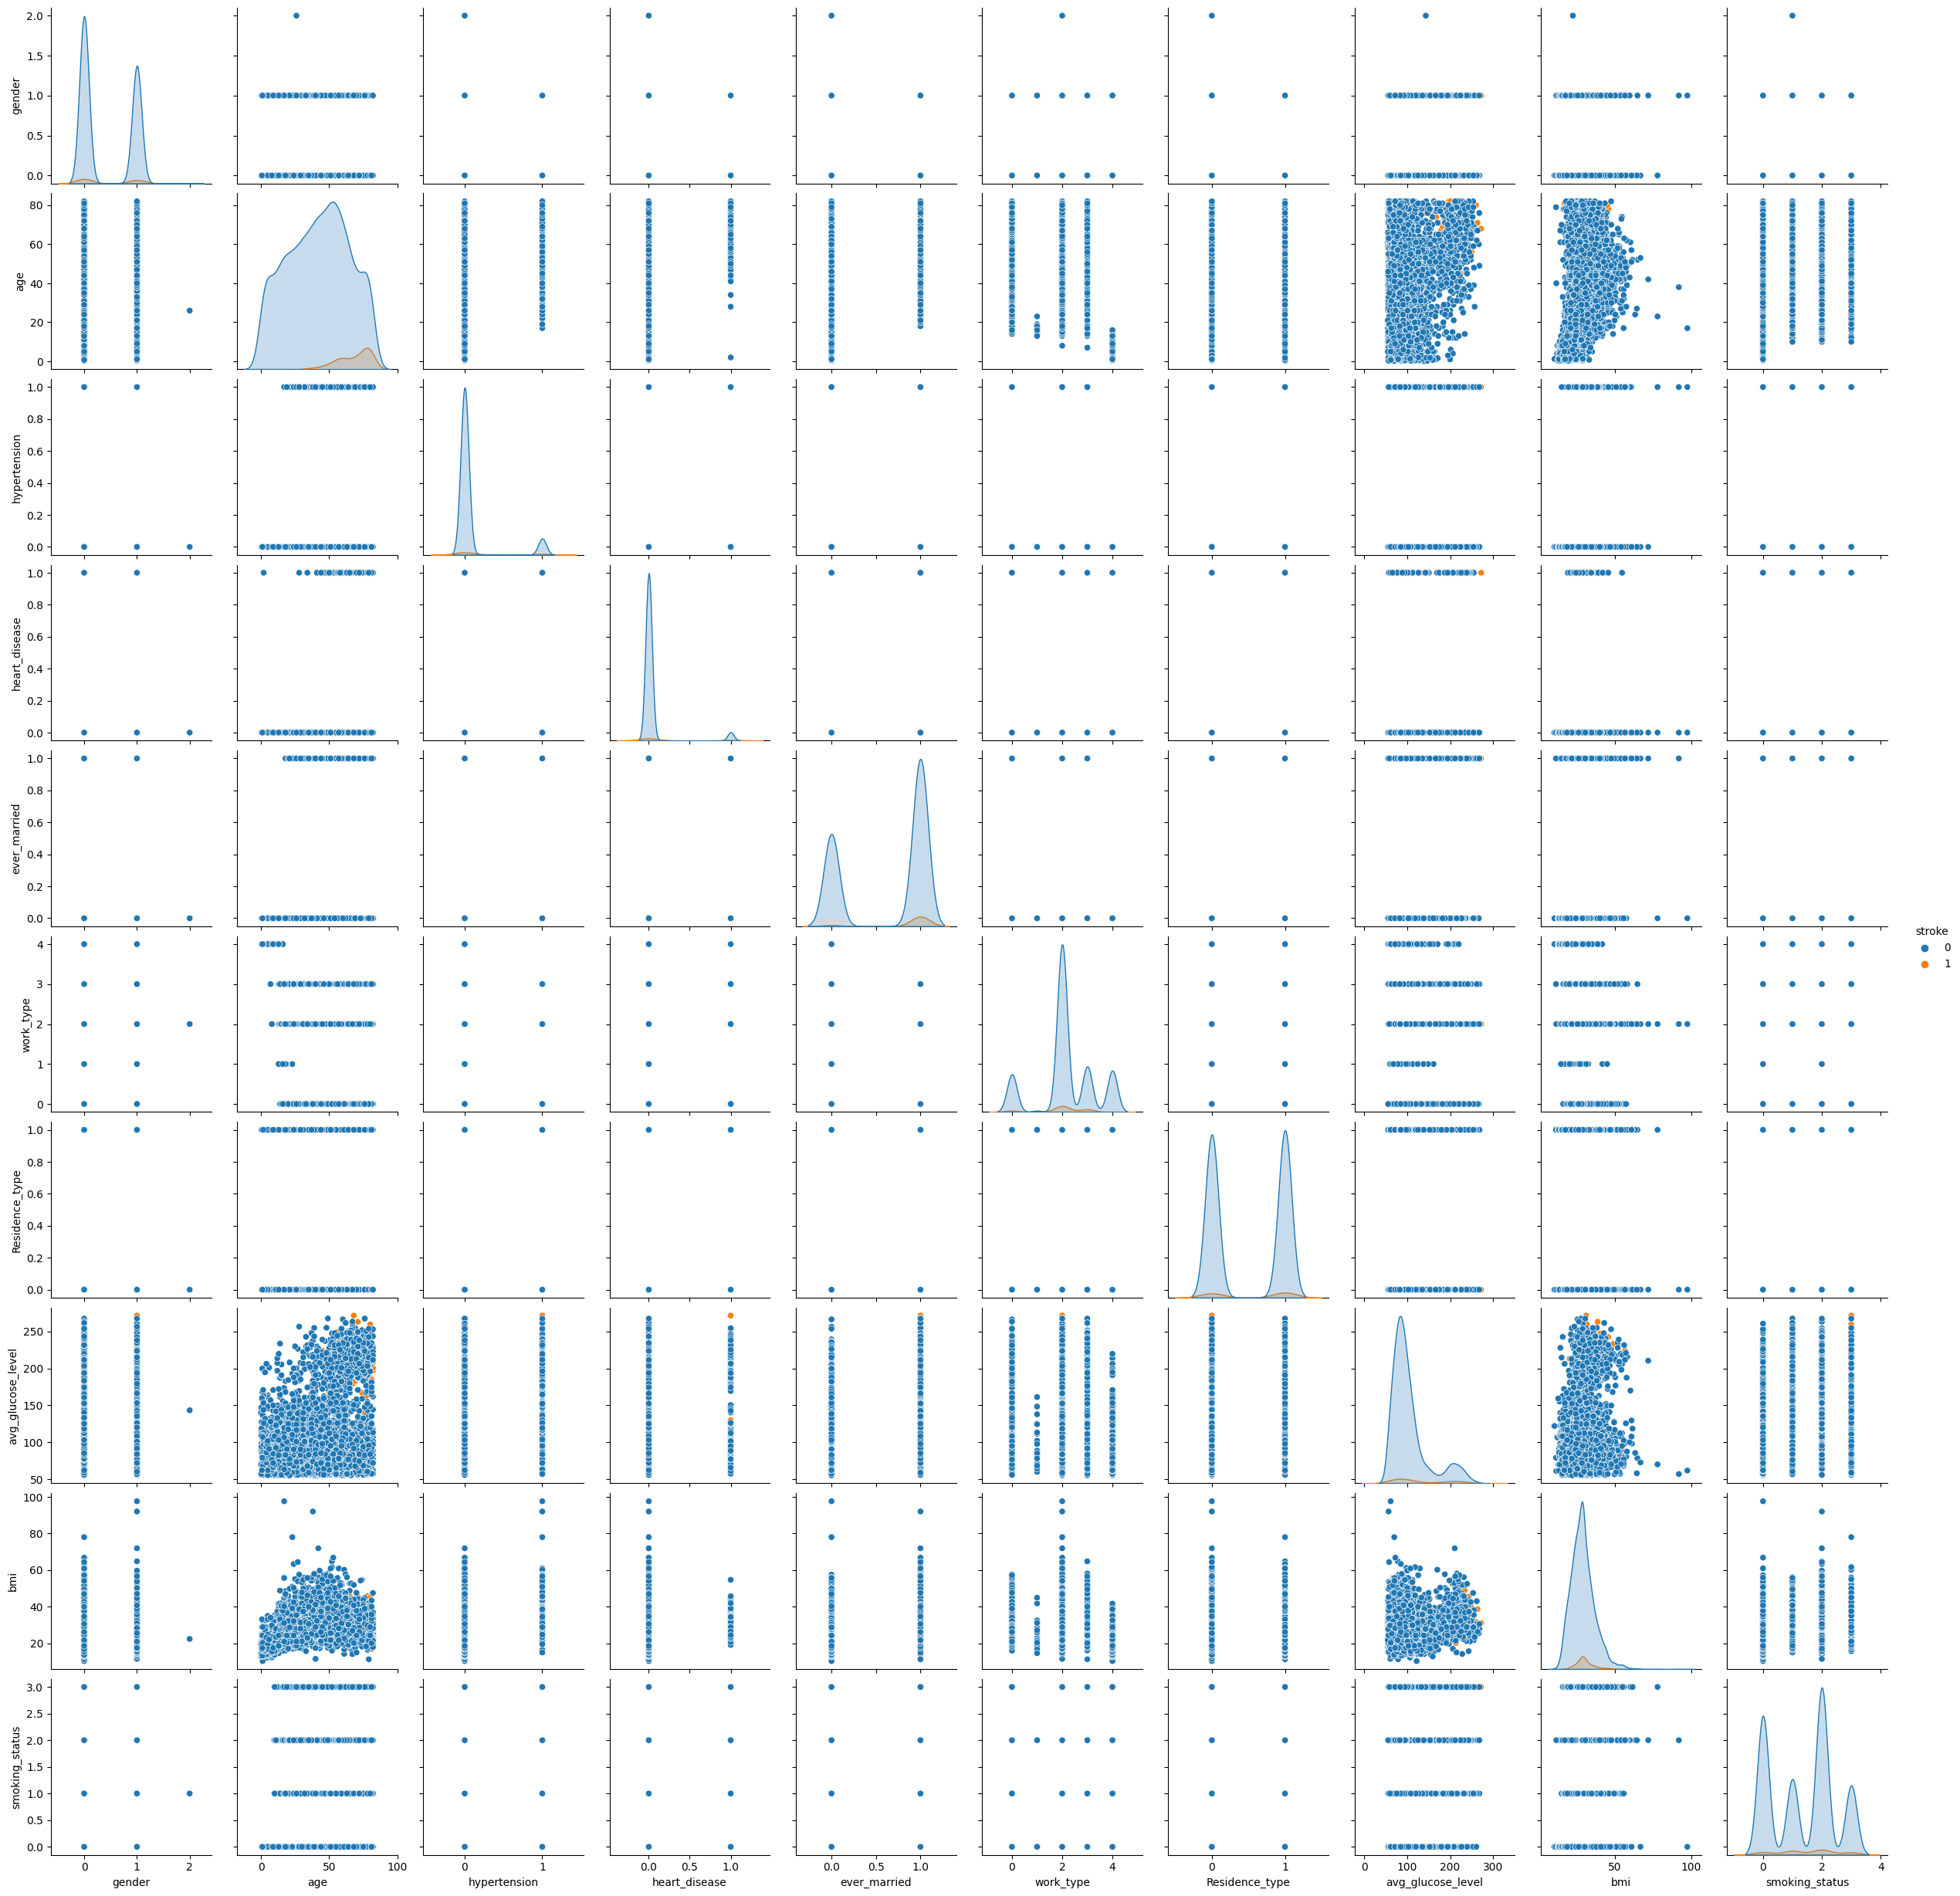

In [47]:
sns.pairplot(data=data_copy,hue="stroke")

In [ ]:
sns.scatterplot(x = data_age,y = data_stroke)
plt.title('Phân bố bệnh theo tuổi')
plt.show()


plt.figure(figsize=(38, 16))
sns.countplot(y = data_non_patient['age'])
plt.title('Phân bố số tuổi người không bị bệnh')
plt.show()

plt.figure(figsize=(38, 16))
sns.countplot(y = data_patient['age'])
plt.title('Phân bố số tuổi người bị bệnh')
plt.show()

In [ ]:

sns.scatterplot(x = data_gender,y = data_stroke)
plt.title('Phân bố bệnh theo giới tính')
plt.show()

In [ ]:
plt.figure(figsize=(38, 16))
sns.countplot(y= data_gender)
plt.title('Phân bố giới tính trong data')
plt.show()

# Huấn luyện mô hình

In [60]:
X = data_copy.drop(['stroke'], axis=1).values
y = data_copy['stroke'].values
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [ ]:
data_cleaned = data.copy()  # Copy the original data

# Replace null values with column mean
data_cleaned['age'].fillna(data_cleaned['age'].mean(), inplace=True)
data_cleaned['avg_glucose_level'].fillna(data_cleaned['avg_glucose_level'].mean(), inplace=True)
data_cleaned['bmi'].fillna(data_cleaned['bmi'].mean(), inplace=True)

# Drop unnecessary column 'id'
data_cleaned = data_cleaned.drop(['id'], axis=1)

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
data_cleaned['gender'] = label_encoder.fit_transform(data_cleaned['gender'])
data_cleaned['ever_married'] = label_encoder.fit_transform(data_cleaned['ever_married'])
data_cleaned['work_type'] = label_encoder.fit_transform(data_cleaned['work_type'])
data_cleaned['Residence_type'] = label_encoder.fit_transform(data_cleaned['Residence_type'])
data_cleaned['smoking_status'] = label_encoder.fit_transform(data_cleaned['smoking_status'])

# Split the data into features and target


In [ ]:
data_cleaned = data.copy()  # Copy the original data

# Replace null values with column mean
data_cleaned['age'].fillna(data_cleaned['age'].min(), inplace=True)
data_cleaned['avg_glucose_level'].fillna(data_cleaned['avg_glucose_level'].min(), inplace=True)
data_cleaned['bmi'].fillna(data_cleaned['bmi'].min(), inplace=True)

# Drop unnecessary column 'id'
data_cleaned = data_cleaned.drop(['id'], axis=1)

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
data_cleaned['gender'] = label_encoder.fit_transform(data_cleaned['gender'])
data_cleaned['ever_married'] = label_encoder.fit_transform(data_cleaned['ever_married'])
data_cleaned['work_type'] = label_encoder.fit_transform(data_cleaned['work_type'])
data_cleaned['Residence_type'] = label_encoder.fit_transform(data_cleaned['Residence_type'])
data_cleaned['smoking_status'] = label_encoder.fit_transform(data_cleaned['smoking_status'])

# Split the data into features and target
X = data_cleaned.drop(['stroke'], axis=1).values
y = data_cleaned['stroke'].values

In [ ]:
data_cleaned = data.copy()  # Copy the original data

# Replace null values with column mean
data_cleaned['age'].fillna(data_cleaned['age'].max(), inplace=True)
data_cleaned['avg_glucose_level'].fillna(data_cleaned['avg_glucose_level'].max(), inplace=True)
data_cleaned['bmi'].fillna(data_cleaned['bmi'].max(), inplace=True)

# Drop unnecessary column 'id'
data_cleaned = data_cleaned.drop(['id'], axis=1)

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
data_cleaned['gender'] = label_encoder.fit_transform(data_cleaned['gender'])
data_cleaned['ever_married'] = label_encoder.fit_transform(data_cleaned['ever_married'])
data_cleaned['work_type'] = label_encoder.fit_transform(data_cleaned['work_type'])
data_cleaned['Residence_type'] = label_encoder.fit_transform(data_cleaned['Residence_type'])
data_cleaned['smoking_status'] = label_encoder.fit_transform(data_cleaned['smoking_status'])

# Split the data into features and target
X = data_cleaned.drop(['stroke'], axis=1).values
y = data_cleaned['stroke'].values

In [53]:

clf = svm.SVC()

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
clf.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = clf.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5352185089974293


In [61]:

clf = svm.SVC(kernel='linear')

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
clf.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = clf.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7758354755784062


In [ ]:

clf = svm.SVC(kernel='rbf', gamma=0.05, C=1000)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
clf.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = clf.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [56]:
clf = joblib.load('svm_model_1.pkl')

# Use the loaded model for prediction
y_pred = clf.predict(X_test)


In [57]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7881748071979434


In [58]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print(precision)

0.7545620437956204


In [62]:

joblib.dump(clf, 'svm_model_1.pkl')

['svm_model_1.pkl']